# Logistic regression #1 (feat. sckit-learn)
* Author: MinDong Sung
* Date: 2022-03-29
---
- One of the most famous classification model
- $\min_{w, c} \|w\| + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$
- Reference: 
    * [scikit-learn - logistic regression](https://scikit-learn.org/dev/modules/linear_model.html#logistic-regression)
    * [scikit-learn - LogisticRegression()](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)


In [2]:
import pandas as pd

In [3]:
data = pd.read_pickle('data/processed/data.pkl')
data.columns

Index(['patientunitstayid', 'intubated', 'vent', 'dialysis', 'eyes', 'motor',
       'verbal', 'meds', 'urine', 'wbc', 'temperature', 'respiratoryrate',
       'sodium', 'heartrate', 'meanbp', 'ph', 'hematocrit', 'creatinine',
       'albumin', 'pao2', 'pco2', 'bun', 'glucose', 'bilirubin', 'fio2',
       'gender', 'age', 'admitdiagnosis', 'aids', 'hepaticfailure', 'lymphoma',
       'metastaticcancer', 'leukemia', 'immunosuppression', 'cirrhosis',
       'electivesurgery', 'activetx', 'readmit', 'diabetes',
       'actualicumortality', 'actualhospitalmortality', 'actualhospitallos'],
      dtype='object')

In [4]:
# remove all null values
data_remove_null = data.dropna()
len(data_remove_null)

6404

## Split dataset as train and test sets
* train set
* test set
* valid set

* <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdVfds2%2FbtqLkhbs7T4%2FU97igLNa0nSfvmBPn5BnbK%2Fimg.png" alt="dataset" width="300"/>

* cross-validation
* <img src="https://blog.kakaocdn.net/dn/3gQO8/btqF0ZOHja8/SUTbGTYwVndcUJ5qWusqa0/img.png" alt="dataset" width="300"/>



In [5]:
from sklearn.model_selection import train_test_split
X_total = data_remove_null.drop(['admitdiagnosis', 'actualicumortality', 'actualhospitalmortality', 'actualhospitallos'], axis=1)
y_total = data_remove_null['actualicumortality']
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, stratify=y_total, test_size=0.20, random_state=2022)

In [6]:
y_train.value_counts()

0    4258
1     865
Name: actualicumortality, dtype: int64

## Create model
* parameters Vs. hyperparameters
> If you have to specify a model parameter manually then
it is probably a model hyperparameter.

In [7]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() # 여러가지 모델 사용 가능
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

## Model evaluation
* <img src="https://blog.kakaocdn.net/dn/NrGwq/btru0vpxoC1/SmY48iCMDYLksZNP3A9bdK/img.png" alt="matrix" width="300"/>

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1065
           1       0.00      0.00      0.00       216

    accuracy                           0.83      1281
   macro avg       0.42      0.50      0.45      1281
weighted avg       0.69      0.83      0.75      1281



/Users/mindongsung/work/20220329_python_lecture/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mindongsung/work/20220329_python_lecture/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mindongsung/work/20220329_python_lecture/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [9]:
# calculate roc_curve 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})

,fpr,tpr,thresholds
0,0.000000,0.000000,1.369019
1,0.000000,0.004630,0.369019
2,0.000000,0.018519,0.333259
3,0.000939,0.018519,0.332967
4,0.000939,0.027778,0.332638
...,...,...,...
341,0.997183,0.990741,0.004306
342,0.997183,0.995370,0.003705
343,0.998122,0.995370,0.003040
344,0.998122,1.000000,0.002293


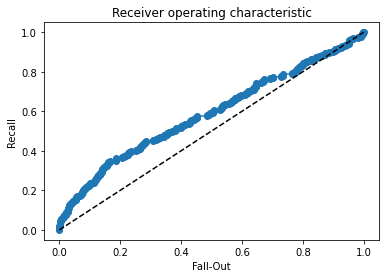

In [10]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'o-', label="Logistic Regression") # o for circle
plt.plot([0, 1], [0, 1], 'k--', label="random guess") # k for black
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic')
plt.show()

In [11]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.5880585985046078

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1065,    0],
       [ 216,    0]])